1.1 Laplacian of Gaussian (LoG) and Difference of Gaussian (DoG)

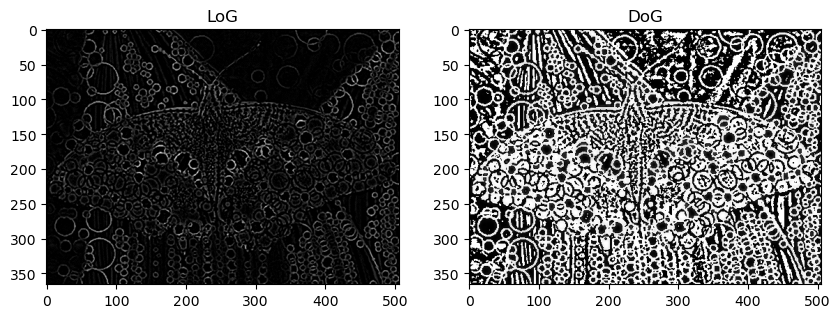

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def blob_detection_log(image, threshold=0.01):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    log = cv2.Laplacian(blurred, cv2.CV_64F)
    log[log < threshold * log.max()] = 0
    return log

def blob_detection_dog(image, sigma1=1, sigma2=2):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur1 = cv2.GaussianBlur(gray, (0, 0), sigma1)
    blur2 = cv2.GaussianBlur(gray, (0, 0), sigma2)
    dog = blur1 - blur2
    return dog

image = cv2.imread('butterfly.webp')
log_result = blob_detection_log(image)
dog_result = blob_detection_dog(image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(log_result, cmap='gray'), plt.title("LoG")
plt.subplot(1, 2, 2), plt.imshow(dog_result, cmap='gray'), plt.title("DoG")
plt.show()

1.2 OpenCV’s SimpleBlobDetector

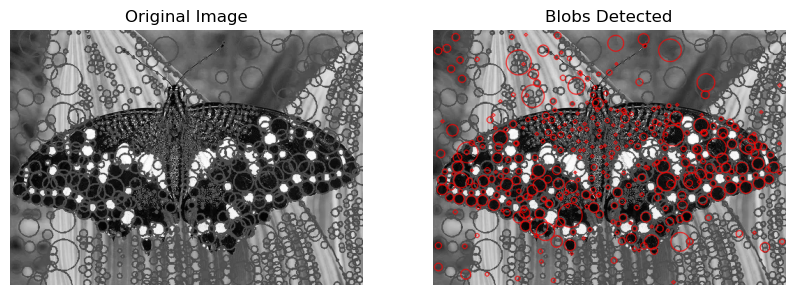

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('butterfly.webp', cv2.IMREAD_GRAYSCALE)


params = cv2.SimpleBlobDetector_Params()
params.minThreshold = 10
params.maxThreshold = 200
params.filterByArea = True
params.minArea = 10
params.maxArea = 5000
params.filterByCircularity = True
params.minCircularity = 0.1
params.filterByConvexity = True
params.minConvexity = 0.5
params.filterByInertia = True
params.minInertiaRatio = 0.1

detector = cv2.SimpleBlobDetector_create(params)


keypoints = detector.detect(image)


result_image = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255),
                                 cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Blobs Detected")
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


1.3 Blob detection on color images

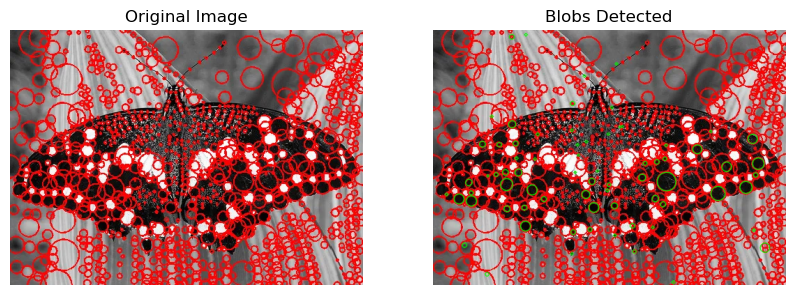

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('butterfly.webp')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 10
params.maxArea = 5000
detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(gray)

result_image = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 255, 0),
                                 cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Blobs Detected")
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


2.1 Harris Corner Detection

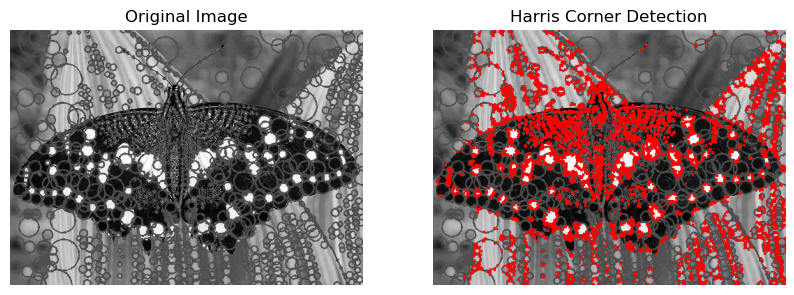

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('butterfly.webp', cv2.IMREAD_GRAYSCALE)

corners = cv2.cornerHarris(image, blockSize=2, ksize=3, k=0.04)


corners = cv2.dilate(corners, None)


result_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
result_image[corners > 0.01 * corners.max()] = [0, 0, 255] 


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Harris Corner Detection")
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()



2.2 Shi-Tomasi Corner Detection

C:\Users\alokp\AppData\Local\Temp\ipykernel_16796\2718429329.py:9: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


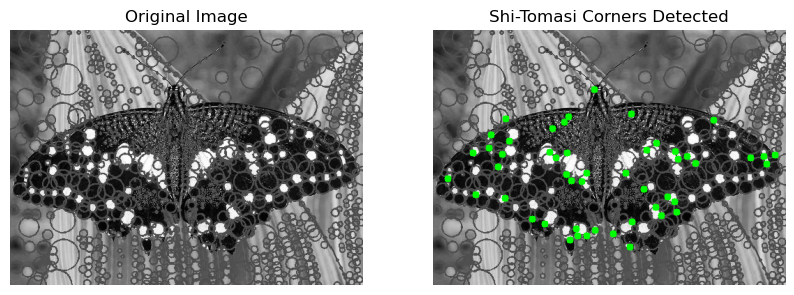

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('butterfly.webp', cv2.IMREAD_GRAYSCALE)

corners = cv2.goodFeaturesToTrack(image, maxCorners=50, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)

result_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)


for corner in corners:
    x, y = corner.ravel()
    cv2.circle(result_image, (x, y), 5, (0, 255, 0), -1)  # Green circles

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Shi-Tomasi Corners Detected")
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
